In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [40]:
net = cv2.dnn.readNet('./face_detector/deploy.protoxt', './face_detector/res10_300x300_ssd_iter_140000.caffemodel')
image = cv2.imread('./datasets/images/IMG-20200510-WA0034.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300), (104.0, 177.0, 123.0))
net.setInput(blob)
detections = net.forward()
(h, w) = image.shape[:2]

In [41]:
detections

array([[[[0.        , 1.        , 0.997806  , ..., 0.22811686,
          0.50586027, 0.42302322],
         [0.        , 1.        , 0.13151297, ..., 3.9935086 ,
          4.8346086 , 4.9810653 ],
         [0.        , 1.        , 0.11807009, ..., 4.0070815 ,
          0.8348509 , 4.9878373 ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]]]], dtype=float32)

0.997806
[360.63523293 364.75885119 607.03232288 676.41413498]


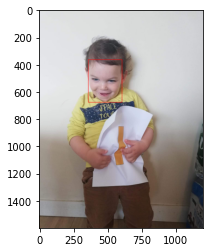

In [42]:
for i in range(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > .6:
        # compute the (x, y)-coordinates of the bounding box for
        # the object
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        # ensure the bounding boxes fall within the dimensions of
        # the frame
        (startX, startY) = (max(0, startX), max(0, startY))
        (endX, endY) = (min(w - 1, endX), min(h - 1, endY))

        cv2.rectangle(image, (startX, startY), (endX, endY), (255, 0, 0), 2)
plt.imshow(image)
plt.show()